In [2]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("Subset_Hockey_Data.csv")
plt.style.use("ggplot")
df.dtypes

homeTeamCode             object
awayTeamCode             object
game_id                   int64
time                      int64
timeUntilNextEvent        int64
period                    int64
team                     object
SOG DIF                  object
stdev                     int64
event                    object
goal                      int64
homeTeamGoals             int64
awayTeamGoals             int64
Goal Diff                 int64
homeEmptyNet              int64
awayEmptyNet              int64
homeSkatersOnIce          int64
awaySkatersOnIce          int64
Manpower Diff             int64
isHomeTeam                int64
shotWasOnGoal             int64
teamCode                 object
isPenalty                 int64
TransitionState          object
isHomeWin                 int64
isHomeLoss                int64
JacobMilesTransitions    object
WillTrans                object
WillCurrentTrans         object
dtype: object

[Text(0, 0.5, 'Time(Seconds)'), (3.0, 7.0)]

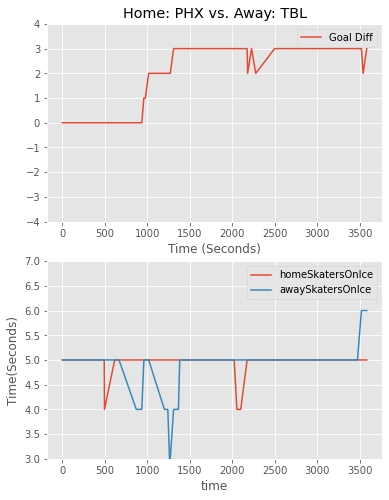

In [59]:
a = 300
game = 20000 + a
df_game = df.loc[df["game_id"] == game].reset_index(drop = True)
goal_diff = list(df_game["Goal Diff"])
time = list(df_game["time"])
home_ice = list(df_game["homeSkatersOnIce"])
away_ice = list(df_game["awaySkatersOnIce"])
fig,(ax0,ax1) = plt.subplots(nrows = 2, ncols = 1, figsize = (6,8))
df_game.plot(kind = "line", x = "time", y = "Goal Diff", ax = ax0)
df_game.plot(kind = "line", x = "time", y = "homeSkatersOnIce", ax = ax1)
df_game.plot(kind = "line", x = "time", y = "awaySkatersOnIce", ax = ax1)
ax0.set(title = "Home: " + df_game["homeTeamCode"][0] + " vs. " + "Away: " + df_game["awayTeamCode"][0], xlabel = "Time (Seconds)", ylim = [-4,4])
ax1.set(ylabel = "Time(Seconds)", ylim = [3,7])

In [2]:
print(df.TransitionState.unique())

['0,5,5' '0,4,5' '0,3,5' '-1,4,5' '-1,4,4' '0,4,4' '0,5,4' '1,5,5' '1,5,4'
 '1,4,5' '0,3,4' '0,4,3' '-1,5,4' '-1,5,5' '-2,5,5' '-2,4,5' '-1,6,5'
 '1,4,4' '1,3,5' '2,5,6' '2,5,5' '2,4,5' '-1,6,4' '-1,5,3' '-1,4,3'
 '2,5,4' '2,4,4' '2,3,5' '1,5,6' '3,4,4' '3,4,5' '3,5,5' '3,5,4' '4,5,5'
 '5,5,5' '5,5,4' '6,5,5' '5,4,5' '5,4,4' '5,3,4' '1,3,4' '-2,4,4' '-2,5,4'
 '-3,5,5' '-3,4,5' '-3,5,4' '-1,3,5' '-2,6,5' '0,5,3' '0,5,6' '1,4,3'
 '2,5,3' '6,4,5' '6,5,4' '6,4,4' '6,3,4' '6,4,3' '1,4,6' '-1,3,4' '4,4,4'
 '4,4,6' '4,5,6' '0,6,5' '1,5,3' '4,4,5' '4,5,4' '5,3,5' '5,5,3' '4,5,3'
 '7,5,5' '-3,3,5' '-4,5,5' '-3,6,5' '3,5,3' '6,5,3' '-3,4,4' '-4,4,5'
 '-4,5,4' '-4,4,4' '3,5,6' '1,3,3' '-2,4,3' '-2,6,4' '-2,5,3' '3,3,4'
 '2,3,4' '-2,3,3' '-5,5,5' '2,4,6' '3,3,5' '-2,3,5' '-5,4,5' '-5,4,4'
 '-5,4,3' '-5,5,4' '0,4,6' '-3,4,3' '-6,5,5' '-6,5,4' '-6,4,5' '-7,5,5'
 '-7,4,5' '-7,3,5' '-7,5,4' '4,4,3' '4,3,4' '3,4,3' '4,6,4' '4,6,3'
 '4,6,5' '2,4,3' '4,3,5' '-3,6,4' '-4,5,3' '3,4,6' '-3,5,3' '-2,3,4'
 '-

In [17]:
df_practice = pd.DataFrame()
df_practice["20003"] = df.loc[df["game_id"] == 20003]["TransitionState"].reset_index(drop = True)
df_practice["20035"] = df.loc[df["game_id"] == 20035]["TransitionState"].reset_index(drop = True)
df_practice.head()

,20003,20035
0,"0,5,5","0,5,5"
1,"0,5,5","0,5,5"
2,"1,5,5","-1,5,5"
3,"1,4,5","-1,5,5"
4,"1,4,5","-1,4,5"


In [4]:
def get_state_one(transitions):
    return transitions.split(">")[0]
def get_win_id(state):
    for s in unique_state_one:
        if s == state:
            return unique_state_one.index(s) + 1
def col_time_printer(win,time):
    print("col" +  str(win) + "("  + str(time) + ")")

In [12]:
f1 = open("col_printer.txt", "w")
def col_printer(win):
    for ident in win:
        f1.write("col" + str(ident) + " =y(:," + str(ident) + ");\n")
col_printer(win_ids)
f1.close()

In [44]:
f2 = open("fprinter.txt","w")
def fprinter(vec):
    win = (str((vec[0])).split(".")[0])
    time = (str((vec[1])).split(".")[0])
    f2.write("\n" + "fprintf('" + time + "\\t%2.15f\\n'," + "col" +  win + "("  + time + ")" + ")")
df_win_time[["WinID","Time"]].apply(fprinter, axis = 1)

0     None
1     None
2     None
3     None
4     None
5     None
6     None
7     None
8     None
9     None
10    None
11    None
12    None
13    None
14    None
15    None
16    None
17    None
18    None
19    None
20    None
21    None
22    None
23    None
24    None
25    None
26    None
27    None
28    None
29    None
30    None
31    None
32    None
33    None
34    None
35    None
36    None
37    None
38    None
39    None
40    None
41    None
42    None
43    None
44    None
45    None
46    None
47    None
48    None
49    None
50    None
51    None
52    None
53    None
54    None
dtype: object

In [5]:
def swap_state_win(state):
    return state_winID.get(state)

In [28]:
#f2 = open("col_time_printer.txt","w")
a = 3
game = 20000 + a
df_win_time = pd.DataFrame()
df_win_time["WinID"] = (df_single_games[game].apply(swap_state_win))
df_win_time["Time"] = df_single_times[game].reset_index(drop = True)
df_win_time.dropna(axis = 0, inplace = True)


,WinID,Time
0,10.0,0.0
1,10.0,63.0
2,32.0,141.0
3,25.0,165.0
4,25.0,178.0
5,10.0,205.0
6,10.0,228.0
7,6.0,233.0
8,6.0,247.0
9,10.0,353.0


In [11]:
df_trans_lambda = pd.read_csv("TransitionsLambdas.csv")
df_trans_lambda.head()
#df_trans_lambda.dtypes
df_trans_lambda["StateOne"] = df_trans_lambda.Transitions.apply(get_state_one)
unique_state_one = list(df_trans_lambda.StateOne.unique())
df_trans_lambda["WinID"] = df_trans_lambda.StateOne.apply(get_win_id)
win_ids = list(df_trans_lambda.WinID.unique())
state_winID = {x:unique_state_one.index(x) + 1 for x in unique_state_one}
#df_trans_lambda.head(-20)
df_trans_lambda.loc[df_trans_lambda["StateOne"] == "0,3,5"]

,Transitions,Lambdas,StateOne,WinID
16,"0,3,5>-1,4,5",0.000065,"0,3,5",3
17,"0,3,5>0,3,5",0.000232,"0,3,5",3
18,"0,3,5>0,4,5",0.000334,"0,3,5",3
19,"0,3,5>0,3,4",0.000109,"0,3,5",3


In [8]:
games = df.game_id.unique()
print(games)
df_single_games = pd.DataFrame()
for i in range(len(games)):
    df_single_games[games[i]] = df.loc[df["game_id"] == games[i]]["TransitionState"].reset_index(drop = True)  
df_single_games.head()

[20001 20002 20003 ... 21228 21229 21230]


,20001,20002,20003,20004,20005,20006,20007,20008,20009,20010,...,21221,21222,21223,21224,21225,21226,21227,21228,21229,21230
0,"0,5,5","0,5,5","0,5,5","0,5,5","0,5,5","0,5,5","0,5,5","0,5,5","0,5,5","0,5,5",...,"0,5,5","0,5,5","0,5,5","0,5,5","0,5,5","0,5,5","0,5,5","0,5,5","0,5,5","0,5,5"
1,"0,5,5","0,5,4","0,5,5","0,5,5","0,5,5","0,5,5","0,5,5","0,5,5","0,5,5","0,5,5",...,"0,5,5","0,5,5","0,5,5","0,5,5","0,5,5","0,5,5","0,5,5","0,5,5","0,5,5","0,5,5"
2,"0,4,5","0,5,4","1,5,5","0,5,5","0,5,5","0,4,5","0,5,4","0,5,5","-1,5,5","0,5,4",...,"0,5,5","-1,5,5","0,5,5","0,5,4","0,5,5","0,5,4","0,5,5","0,5,5","-1,5,5","0,4,5"
3,"0,4,5","0,5,5","1,4,5","0,5,4","0,4,5","0,4,5","0,5,4","1,5,5","-1,4,5","1,5,5",...,"0,5,5","-2,5,5","0,4,5","0,4,4","0,5,5","0,5,4","1,5,5","0,5,5","-1,5,5","-1,5,5"
4,"0,3,5","1,5,5","1,4,5","0,5,4","0,4,5","0,5,5","0,5,5","1,5,5","-1,4,4","1,5,5",...,"0,4,5","-1,5,5","0,4,5","0,4,5","0,5,5","1,5,5","1,5,5","0,5,5","-1,5,5","-1,5,5"


In [9]:
df_single_times = pd.DataFrame()
for i in range(len(games)):
    df_single_times[games[i]] = df.loc[df["game_id"] == games[i]]["time"].reset_index(drop = True)
df_single_times.head(10)

,20001,20002,20003,20004,20005,20006,20007,20008,20009,20010,...,21221,21222,21223,21224,21225,21226,21227,21228,21229,21230
0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,74,121.0,63.0,17.0,133.0,26.0,25.0,27.0,98.0,60.0,...,33.0,53.0,21.0,63.0,58.0,87.0,32.0,27.0,25.0,75.0
2,383,126.0,141.0,301.0,188.0,269.0,152.0,505.0,318.0,122.0,...,100.0,127.0,553.0,418.0,181.0,846.0,217.0,259.0,731.0,87.0
3,396,241.0,165.0,411.0,212.0,300.0,261.0,566.0,567.0,125.0,...,372.0,511.0,647.0,479.0,203.0,867.0,313.0,286.0,774.0,155.0
4,438,246.0,178.0,438.0,214.0,389.0,272.0,627.0,567.0,146.0,...,373.0,591.0,759.0,538.0,501.0,886.0,578.0,337.0,967.0,205.0
5,481,606.0,205.0,499.0,241.0,431.0,459.0,669.0,613.0,182.0,...,373.0,752.0,766.0,588.0,502.0,938.0,595.0,434.0,1023.0,745.0
6,539,609.0,228.0,531.0,306.0,705.0,612.0,739.0,656.0,295.0,...,432.0,923.0,767.0,599.0,622.0,999.0,651.0,590.0,1104.0,1231.0
7,603,642.0,233.0,534.0,332.0,747.0,612.0,923.0,687.0,343.0,...,493.0,1078.0,825.0,708.0,627.0,1080.0,688.0,628.0,1162.0,1277.0
8,608,666.0,247.0,678.0,338.0,769.0,732.0,1043.0,687.0,585.0,...,493.0,1105.0,2453.0,810.0,713.0,1088.0,705.0,661.0,1214.0,1351.0
9,678,810.0,353.0,684.0,361.0,825.0,769.0,1193.0,717.0,642.0,...,1119.0,1179.0,2462.0,829.0,756.0,1118.0,715.0,710.0,1257.0,1397.0


In [ ]:
# Visualize any game
"fprintf('" + game.getTime() + "\\t%2.15f\\n'," + "col" +  game.getWinID() + "("  + game.getTime() + ")" + ")"

In [6]:
#print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


In [ ]:
def(gameID,state,time):
    df_single_game[gameID]

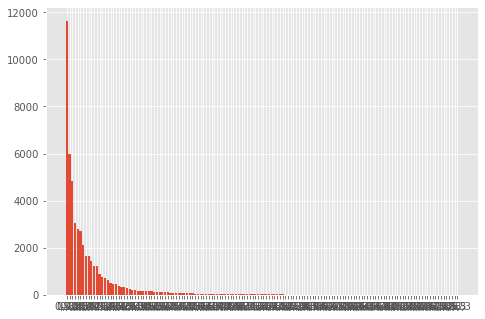

0,5,5     11653
1,5,5      5973
-1,5,5     4852
0,5,4      3036
2,5,5      2781
          ...  
4,6,5         1
-4,6,3        1
-5,3,3        1
7,5,3         1
2,3,6         1
Name: TransitionState, Length: 144, dtype: int64

In [9]:
# Shows the number of instances of a state in Bar graph
# Does not weight for time.
count_tState = [i for i in df["TransitionState"].value_counts()]
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(df["TransitionState"].unique(),count_tState)
plt.show()
df["TransitionState"].value_counts()

ValueError: plot kind scatter can only be used for data frames

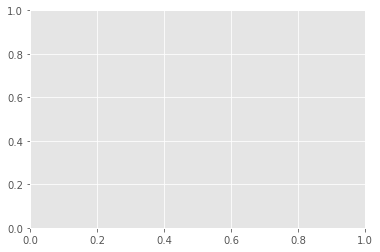